In [104]:
import json
import umap
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from easydict import EasyDict as edict

colors = ['#66b3ff', '#ff6666']
reducer = umap.UMAP()

# Load the data

In [97]:
data = json.load(open('../data/labeled_data.json'))
data_ids = []
with open('../src/adv_flood_3_val_idx.lst') as idx_file:
    data_ids = idx_file.readlines()
data_ids = [sample.strip() for sample in data_ids]
len(data_ids)

437

## Embedding space plotting function

In [190]:
def plot_embedding(umap_embeddings, labels, save_path):
    size=80
    noncrit_embeddings = umap_embeddings[np.where(labels == 0)]
    crit_embeddings = umap_embeddings[np.where(labels == 1)]
    plt.scatter(noncrit_embeddings[:, 0], noncrit_embeddings[:, 1], c=colors[0], marker='o', label='non-critical', alpha=0.8, s=[size]*len(noncrit_embeddings))
    plt.scatter(crit_embeddings[:, 0], crit_embeddings[:, 1], c=colors[1], marker='^', label='critical', alpha=0.8, s=[size]*len(crit_embeddings))
    plt.gca().set_aspect('equal', 'datalim')
    plt.axis('off')
    plt.savefig(save_path)

# Baseline embeddings map

In [140]:
base_data = edict(np.load('../src/base_embeddings.npy', allow_pickle=True).item())
base_data.labels = np.array(base_data.labels)
base_data.embeddings.shape

(448, 200)

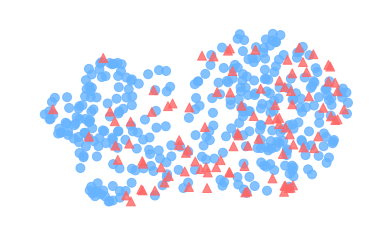

In [193]:
base_umap_embedding = reducer.fit_transform(base_data.embeddings)
plot_embedding(base_umap_embedding, base_data.labels, '../images/baseline_embeddings_map.pdf')

# Multitask embeddings map

In [119]:
mt_data = edict(np.load('../src/mt_embeddings.npy', allow_pickle=True).item())
mt_data.labels = np.array(mt_data.labels)
mt_data.embeddings.shape

(448, 200)

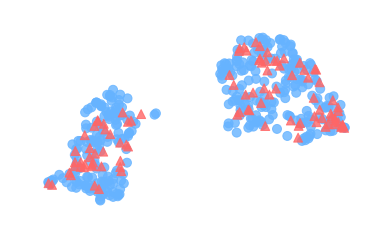

In [201]:
mt_umap_embedding = reducer.fit_transform(mt_data.embeddings)
plot_embedding(mt_umap_embedding, mt_data.labels, '../images/multitask_embeddings_map.pdf')

# Adversarial embeddings map

In [148]:
adv_data = edict(np.load('../src/adv_embeddings.npy', allow_pickle=True).item())
adv_data.labels = np.array(adv_data.labels)
adv_data.embeddings.shape

(448, 200)

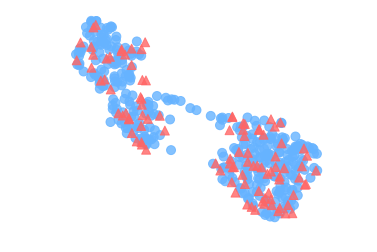

In [206]:
adv_umap_embedding = reducer.fit_transform(adv_data.embeddings)
plot_embedding(adv_umap_embedding, adv_data.labels, '../images/adversarial_embeddings_map.pdf')

## Adversarial umap embedding cluster analysis

In [89]:
left_cluster, right_cluster = list(), list()
for idx, e in enumerate(adv_umap_embedding):
    if e[0] < -1:
        left_cluster.append(idx)
    elif e[0] > 5:
        right_cluster.append(idx)

In [96]:
for idx in left_cluster:
    if idx <  len(data_ids):
        print(f'{data[data_ids[idx]]["label"]}: {data[data_ids[idx]]["text"]}')

low: rt fact genesis 8 712 is about no ahs ark today is 8 712
low: rt people needing help may text at 0905 1456 217 | 092 935 100 68 | 093 2360 8 563 please re tweet
low: mt de la salle college of saint benilde following the official announcement to suspend
low: the u.s. embassy here in manila looks like it is floating above the flood it has been two weeks and the hea
high: trapped no food water since 9am ellen p h9 mariposa st midtown village cainta 090 624 24 937
low: stay tuned for announcements check the
low: this is the moment i really love which had a great heart for filipinos | she is a total package of modern woman
low: photos floods in manila are displacing tens of thousands of people |
low: kon ting click lang maka ka donate ka na via paypal just click this link
high: 74 yrs old lady trapped at 17 kap iligan st araneta subd qc all grilled windows locked water already at 2nd floor help rt
low: rt folks please tweet calls for rescue in the san juan to cong. who has agreed to fi

In [95]:
for idx in right_cluster:
    print(f'{data[data_ids[idx]]["label"]}: {data[data_ids[idx]]["text"]}')

high: rt concepcion integrated school marikina has 582 families no food yet the whole day please rt
low: break muna :-) read this open letter to h daw kasi after gener ps si helen yun not you
low: pagasa 9pm advisory red warning for metro manila heavy intense rains in next 3 hrs. floods in low-lying areas near rivers
high: rescue needed in romualdez st. cor kalen tong 1st house beside caltex lolo and lola residing
low: rt sending love and worry to the philippines will also send aid donation using info
low: rt mayor jun binay also says that will also receive calls for rescue in the makati area | via usec ...
low: rt help needed in malabon people need drinking water ready-to-eat food &amp; meds
low: rt want to donate or to volunteer check out this list via
low: rt reported florentino bernardo and company antonette st parkway vill agd brgy apolonio samson 094 360 5 1153
low: manila residents clean up after deadly floods
low: rt please help me spread this i cant be online this week ...
low